## Data Science Analyse

Dieses Notebook setzt sich mit den Anfängen der Covid-19-Pandemie auseinander. Dabei primär mit deutschen Landkreisen und Bundesländern. Außerdem wird ein Vergleich zu den USA gezogen mit dem dort vorherrschenden System der Counties. 
Alle Auswertungen werden in diesem Notebook vorgenommen.
Zuerst werden die Datensätze genauer betrachtet, um dann spezielle Landkreise und Counties zu analysieren und sie miteinander zu vergleichen. Danach wird geschaut, ob man einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Covid-Fallzahlen identifizieren kann. Dies geschieht mithilfe von Scatterplots. Des Weiteren werden auch andere Analysemethoden wie Clustering oder Nearest Neighbor Klassifizierung angewendet.

In [1]:
%run 2_Data_Science_Preprocessing.ipynb

### Betrachtung der Datensätze

In [2]:
durchwachstumfnl.describe()

,AGR
count,16.000000
mean,0.101460
std,21.654093
min,-56.886358
25%,-2.131658
50%,-0.305537
75%,0.491852
max,55.198796


Das DataFrame durchwachstumfnl zeigt die prognostizierten durchschnittlichen Wachstumsraten der täglichen Covid-Fallzahlen aller deutschen Bundesländer. Hierbei wurde, mit den erhobenen Daten bis zum 20.06.2020, mithilfe der linearen Regression ein Prognosemodell erstellt. Die Daten wurden mithilfe eines Scrapers selbst beschaffen. 
Die Prognosen für die Bundesländer liegen im Durchschnitt bei 0,1 %. Die Standardabweichung liegt bei 21,65. Der kleinste Wert ist - 56.89 % Schleswig-Holstein und der größte 55,2 % Bremen. Das untere Quartil liegt bei -2,13 und das obere bei 0,49. Also kann man Bremen (max) als Ausreißer betrachten.

In [3]:
compLK.describe()

,AGR,Bev.D.Ew./km²,AGR_D
count,289.000000,289.000000,289.000000
mean,8.299639,274.096886,-15.718240
std,21.644359,347.769696,37.423679
min,-42.893236,38.000000,-169.993755
25%,-3.575758,106.000000,-8.546919
50%,8.070663,157.000000,-5.454545
75%,21.821368,270.000000,-2.727273
max,66.696223,2954.000000,10.143579


In [4]:
d["Hochsauerlandkreis"].describe()

,index,cases,cases_per_100k,deaths,deaths_per_100k,täglicher Wachstum,dailycases,dailydeaths,dailycases_per_100k,dailydeaths_per_100k,Rate,RateD
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,25828.500000,435.154545,167.061921,11.636364,4.467339,inf,5.600000,0.154545,2.149918,0.059332,19.982338,-6.969697
std,1690.608618,227.514378,87.345952,7.411530,2.845373,NaN,8.428001,0.510196,3.235626,0.195873,128.985177,25.178448
min,22940.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-100.000000
25%,24384.250000,248.500000,95.402600,2.000000,0.767800,0.000000,0.000000,0.000000,0.000000,0.000000,-43.813131,0.000000
50%,25828.500000,564.000000,216.527500,17.000000,6.526500,0.001779,1.000000,0.000000,0.383950,0.000000,0.000000,0.000000
75%,27272.750000,607.000000,233.035800,17.000000,6.526500,0.044826,8.000000,0.000000,3.071300,0.000000,0.000000,0.000000
max,28717.000000,616.000000,236.491000,17.000000,6.526500,inf,36.000000,3.000000,13.820900,1.151800,800.000000,0.000000


Das DataFrame compLK zeigt deutsche Landkreise. Diese Daten wurden auch vorverarbeitet, um die mittlere Wachstumsrate der Covid-Infektionen und Tode in Folge durch Covid bis zum 20.06.2020 jedes Landkreises zu haben. Außerdem wurde jedem Landkreis, als zweite Kennzahl, die Bevölkerungsdichte (Personen pro km²) zugeordnet.  Weitere Kennzahlen wie die täglichen Neuinfektionen und die täglichen Todeszahlen pro 100.000 Bewohner sind über d[Landkreis] abrufbar. Nun sind diese Daten bereit für weitere Analyse. 
Es wurden 279 Landkreise in Betracht gezogen. In jedem Landkreis steigt im Durchschnitt jeden Tag die Infizierten Zahl um 8,3 % an. Dabei liegt die Standardabweichung bei 21,64. Da der maximale Wert bei 66,7 % liegt und das obere Quartil bei 21,82 kann man davon ausgehen, dass die Daten durch Ausreißer verzerrt sind. 
Denselben Schluss kann man bei dem durchschnittlichen Wachstum der Zahl der Toten ziehen, jedoch lässt sich dort ein negativ Trend erkennen. Dies zeigt, dass im Durchschnitt die Zahl der durch Covid verstorbenen nicht steigt.

In [5]:
DFCounty[['AGR','Density']].describe()

,AGR,Density
count,3001.000000,3001.000000
mean,2.959759,197.374970
std,19.559818,1233.518335
min,-16.890380,0.207648
25%,-6.572920,15.751531
50%,-2.013423,41.882507
75%,7.416906,105.241947
max,645.690589,48358.254157


Der letzte Datensatz besteht aus US-amerikanischen Counties, diese sind mit deutschen Landkreisen vergleichbar. Die bereits aufbereiteten Daten werden kostenlos von einer amerikanischen Non-Profit-Organisation namens „USAFacts“ bereitgestellt. Auch hier wurde die mittlere Wachstumsrate der Covid-Infektionen für jedes County berechnet. Um diese Daten mit denen der Landkreise zu vergleichen, wurde als zweite Kennzahl auch die Bevölkerungsdichte berechnet. Dies stellte sich jedoch als schwieriger heraus, da es dazu keine aktuellen verlässlichen Daten gibt. Somit wurde die Bevölkerungszahl von der letzten Volkszählung aus 2010 nehmen. Da in den USA kein Einwohnermeldeamt existiert, gibt es keine aktuelleren Daten. Damit wurde die Bevölkerungsdichte berechnet.
Für einen Vergleich mit den USA wurden 3001 Counties zum Vergleich gezogen. Hier lag im Durchschnitt die durchschnittliche Wachstumsrate der täglichen Covid-Fallzahlen bei 2,32 %. Da der maximale Wert bei 88,07 % liegt und das obere Quartil bei 7,09 kann man davon ausgehen, dass die Daten durch Ausreißer verzerrt sind. 

### Genauere Betrachtung einzelner Landkreise und Counties in verschiedenen Punkten

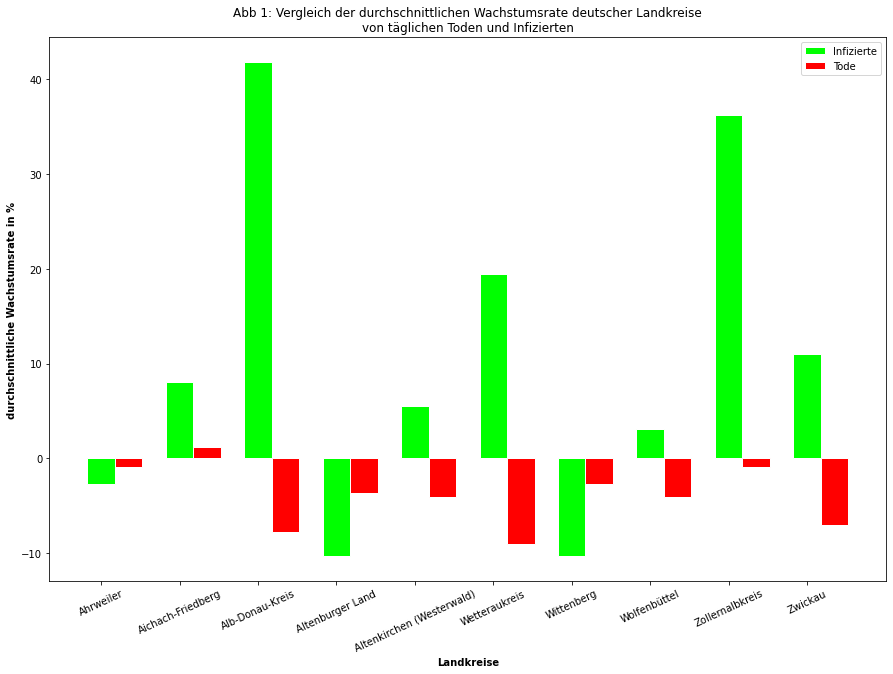

In [6]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLKbar = pd.DataFrame()
compLK = compLK.loc[compLK['Landkreis'] != 'Würzburg']
compLKbar = compLK.iloc[:5]
compLKbar = compLKbar.append(compLK.tail(5))
#compLKbar.plot(kind='bar', x = 'Landkreise/Kreis', y= 'AGR', ax=ax,label='durchschnittliche Wachstumsrate')

labels = compLKbar['Landkreis']
width = 0.35  # the width of the bars
bars1 = compLKbar['AGR']
bars2 = compLKbar['AGR_D']
 
# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + 0.35 for x in r1]

plt.bar(r1, bars1, color='#00ff00', width=0.35, edgecolor='white', label='Infizierte')
plt.bar(r2, bars2, color='#ff0000', width=0.35, edgecolor='white', label='Tode')

plt.title('Abb 1: Vergleich der durchschnittlichen Wachstumsrate deutscher Landkreise\nvon täglichen Toden und Infizierten')
plt.xlabel('Landkreise', fontweight='bold')
plt.ylabel('durchschnittliche Wachstumsrate in %', fontweight='bold')
ax.set_xticklabels(labels)
ax.set_xticks(r1)
plt.xticks(rotation = 25)

plt.legend()
plt.show()

In Abbildung 1 wurden 10 zufällig ausgewählte deutsche Landkreise mithilfe eines Säulendiagramms verglichen. Bei den ausgewählten Landkreisen sieht man, dass die tägliche Wachstumsrate der Tode oft im negativen Bereich oder sehr bei null ist und es keine Ausreißer zu geben scheint. Bei der täglichen Wachstumsrate der Covid-Fallzahlen jedoch scheint kein Muster erkennbar zu sein.

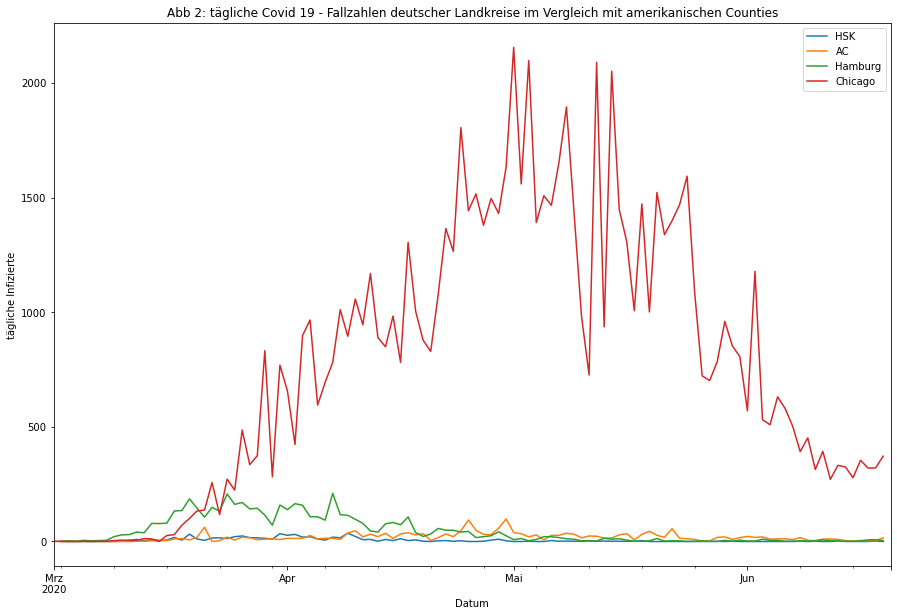

In [7]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County_NY'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Hamburg'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Hamburg")
dic['Cook County_IL'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="Chicago")
ax.set_title('Abb 2: tägliche Covid 19 - Fallzahlen deutscher Landkreise im Vergleich mit amerikanischen Counties')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte')
ax.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 6, 20)])
plt.show()

Mithilfe eines Liniendiagramms (Abb. 2) wurden die täglichen Covid-19-Fallzahlen visualisiert. Hier wurden der Hochsauerlandkreis und Hamburg als deutsche Beispiele genutzt und als amerikanische Beispiele Albany County (NY) und Cook County (IL). Albany County ist ein im Staat New York liegendes ländliches County. Clark County ist die Stadt Chicago und Teile deren Metropolregion. 
Es sei gesagt, dass diese Werte sich nur mit Vorsicht vergleichen lassen, da es zu den amerikanischen Counties, leider keine Informationen über die Fallzahlen pro 100.000 Einwohner gab. 
Jedoch lässt sich hier sagen, dass die Pandemie in Deutschland früher "angekommen" ist als in den USA, da die Kurven der deutschen Beispiele deutlich früher steigen.

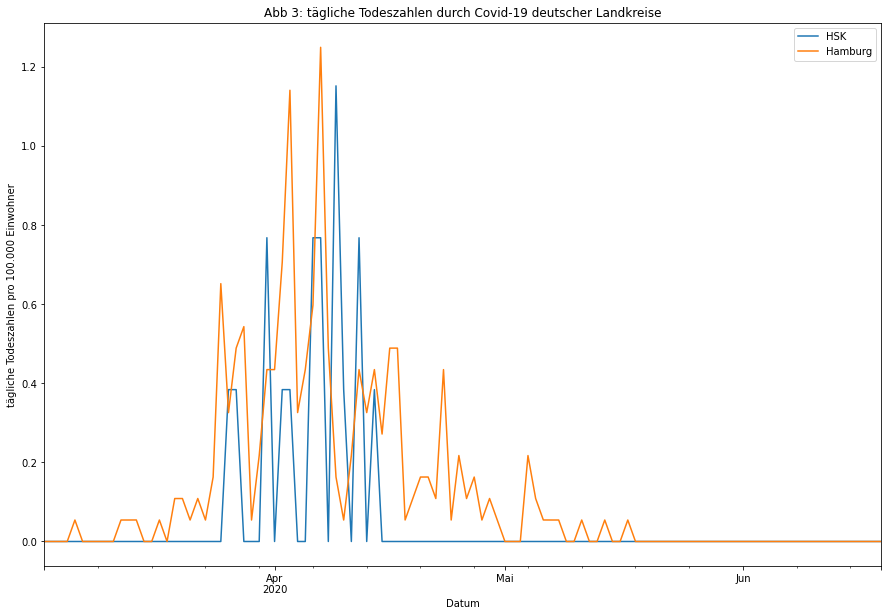

In [8]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths_per_100k', ax=ax, label="HSK")
d['Hamburg'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths_per_100k', ax=ax, label="Hamburg")

ax.set_title('Abb 3: tägliche Todeszahlen durch Covid-19 deutscher Landkreise')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen pro 100.000 Einwohner')
plt.show()

Abbildung 3 zeigt die täglichen Tode auf 100.000 Einwohner wurden für den HSK und Hamburg. Dies war für amerikanische Counties nicht möglich, da die herangezogenen Daten keine Todesopfer beinhalteten. 
Man kann sehen, dass die herangezogenen Daten vergleichbar sind und es bei beiden Landkreisen hin und wieder nur ein paar Todesmeldungen gab.

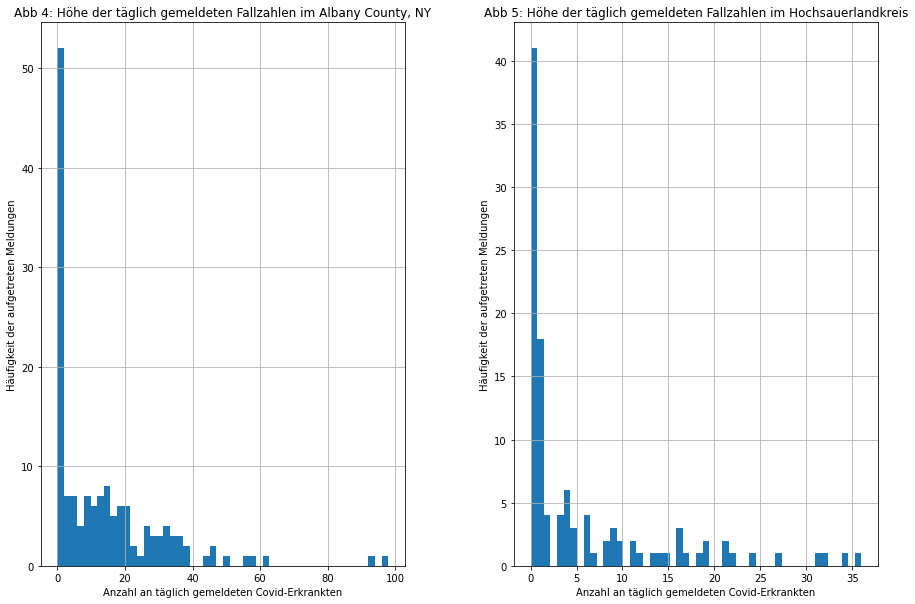

In [9]:
fig, ax = plt.subplots(1, 2,figsize = (15, 10))

dic['Albany County_NY'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an täglich gemeldeten Covid-Erkrankten')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Abb 4: Höhe der täglich gemeldeten Fallzahlen im Albany County, NY')

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an täglich gemeldeten Covid-Erkrankten')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Abb 5: Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')
plt.show()

Als Nächstes wurde mithilfe eines Histogramms gezeigt, dass die meisten täglichen Meldungen im Albany County und im Hochsauerlandkreis eine sehr geringe Anzahl an neuen Infizierten hatten. Außerdem zeigt der Vergleich, dass im Albany County täglich höhere neue Fallzahlen gemeldet wurden als im HSK. Wobei es im HSK maximal zu Tagen mit 20 neuen Fällen kam, gibt es im Albany County schon Tage, an denen bis zu 30 neue Infizierte gemeldet wurden. Ohne den Durchschnitt zu kennen, kann man davon ausgehen, dass der tägliche Durchschnitt an neuen Meldungen im Albany County höher ist.

In [10]:
print("tägliche Durchschnitt an neuen Meldungen im Albany County:",round(dic['Albany County_NY']["dailycases"].mean()),2)
print("tägliche Durchschnitt an neuen Meldungen im Hochsauerlandkreis:",d['Hochsauerlandkreis']["dailycases"].mean())

tägliche Durchschnitt an neuen Meldungen im Albany County: 14 2
tägliche Durchschnitt an neuen Meldungen im Hochsauerlandkreis: 5.6


Die kurz vorher aufgestellte Hypothese konnte mit der vorherigen Zelle bewiesen werden.

HSK:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       167.061921         4.467339
std         87.345952         2.845373
min          0.000000         0.000000
25%         95.402600         0.767800
50%        216.527500         6.526500
75%        233.035800         6.526500
max        236.491000         6.526500

Hamburg:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       197.616460         9.502306
std        100.296621         5.804869
min          0.108600         0.000000
25%        128.436750         2.987225
50%        257.145050        13.198100
75%        274.077075        14.284300
max        279.006000        14.284300


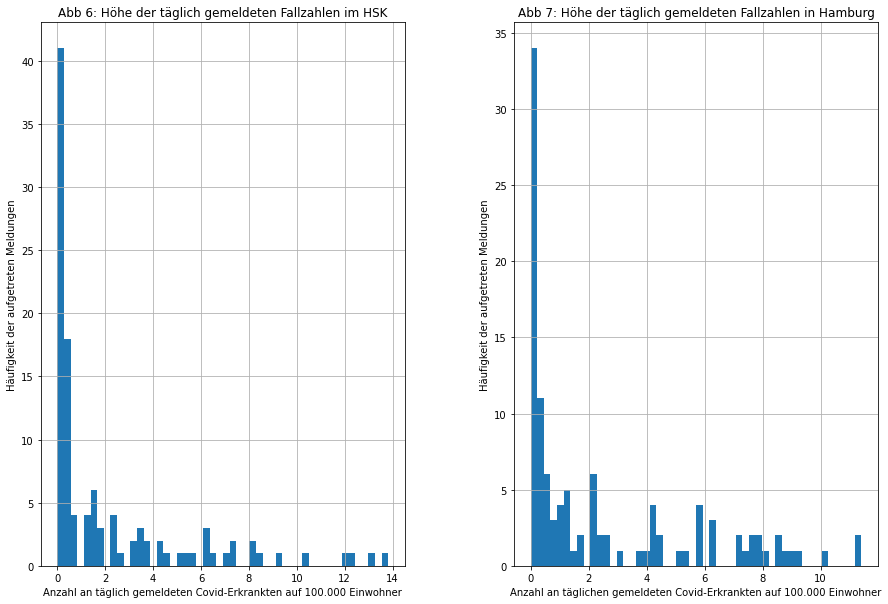

In [11]:
print("HSK:\n",d['Hochsauerlandkreis'][['cases_per_100k','deaths_per_100k']].describe())
print("\nHamburg:\n",d['Hamburg'][['cases_per_100k','deaths_per_100k']].describe())

fig, ax = plt.subplots(1, 2,figsize = (15, 10))

d['Hochsauerlandkreis'].hist('dailycases_per_100k', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an täglich gemeldeten Covid-Erkrankten auf 100.000 Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Abb 6: Höhe der täglich gemeldeten Fallzahlen im HSK')

d['Hamburg'].hist('dailycases_per_100k', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an täglichen gemeldeten Covid-Erkrankten auf 100.000 Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Abb 7: Höhe der täglich gemeldeten Fallzahlen in Hamburg')
plt.show()

Als nächstes (Abb. 6 und 7) wurde der Hochsauerlandkreis mit Hamburg in Punkten der täglichen Infizierten und Tode auf 100.000 Einwohner bis zum 20.06, verglichen. Die reinen Daten sind sich relativ ähnlich. Mithilfe von Histogrammen zeigten sich auch hier gewisse Ähnlichkeiten, damit lassen sich keine Rückschlüsse auf den Unterschied zwischen ländlichen und urbanen Landkreisen ziehen. 

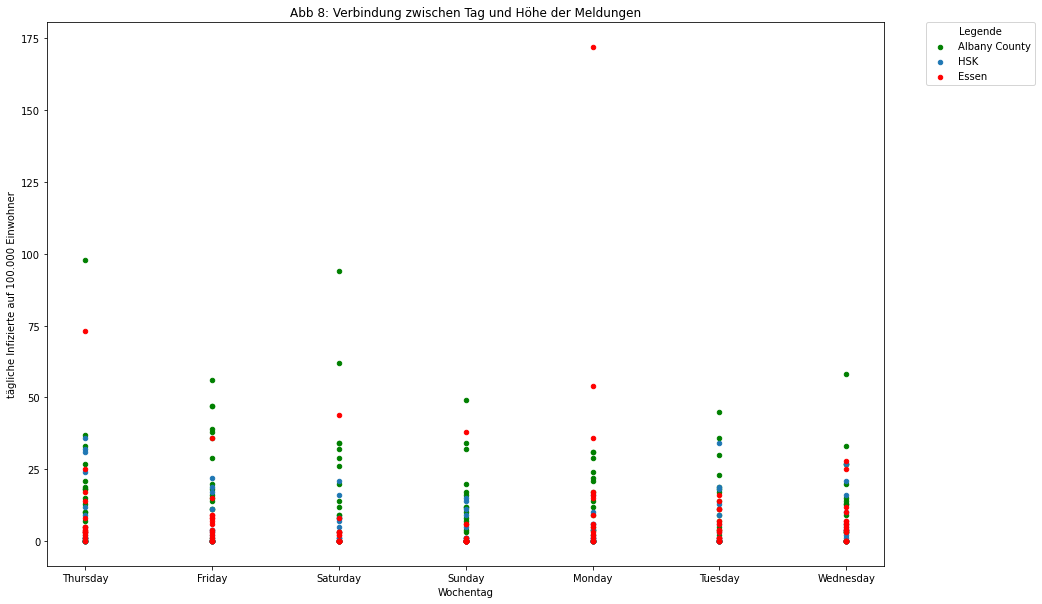

In [12]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
dic['Albany County_NY'].plot(kind='scatter', x = 'Weekday', y= 'dailycases', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
ax.set_xlabel('Wochentag')
ax.set_ylabel('tägliche Infizierte auf 100.000 Einwohner')
ax.set_title('Abb 8: Verbindung zwischen Tag und Höhe der Meldungen')
plt.show()

Abbildung 8 zeigt ein Streudiagramm, bei dem versucht wurde, einen Zusammenhang zwischen den täglich gemeldeten Infizierten und dem gemeldeten Wochentag nachzuweisen. Hierfür wurden wieder der HSK, Essen und das Albany County herangezogen. Aus dem Streudiagramm lässt sich kein Zusammenhang zwischen dem gemeldeten Wochentag und der Höhe der Fallzahlen erkennen.

### Betrachtung der Bundesländer und deren Prognosen mithilfe der linearen Regression

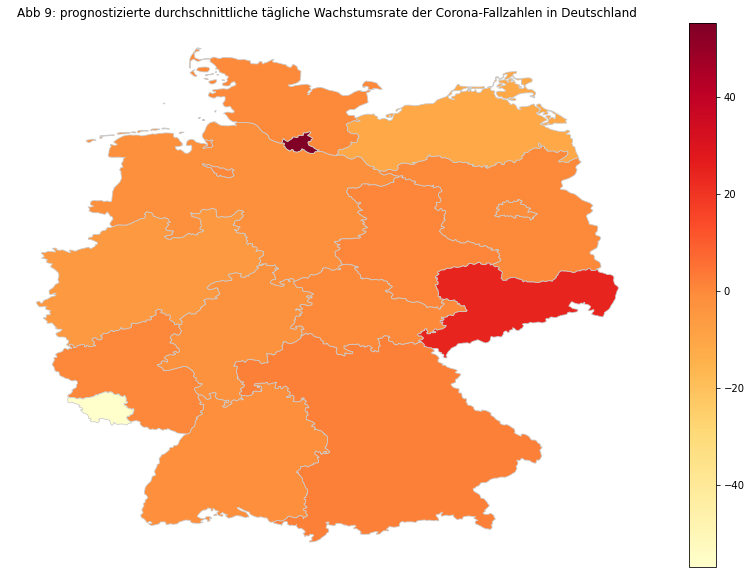

In [13]:
import geopandas as gpd

DEmap = gpd.read_file("geopandas/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
min_Wachstum = column.min()
vmin, vmax = min_Wachstum, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Abb 9: prognostizierte durchschnittliche tägliche Wachstumsrate der Corona-Fallzahlen in Deutschland')

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte (Abb. 9) ist die prognostizierte durchschnittliche tägliche Wachstumsrate der Infizierten in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine negative Wachstumsrate haben, jedoch Sachsen und Bremen im Vergleich eine sehr hohe und das Saarland eine sehr niedrige. Die Prognosen wurden mithilfe von linearer Regression und realen Daten, die bis zum 30.06 erhoben wurden, aufgestellt. Es ist kein Muster zwischen Ost und West oder regierenden Parteien erkennbar.

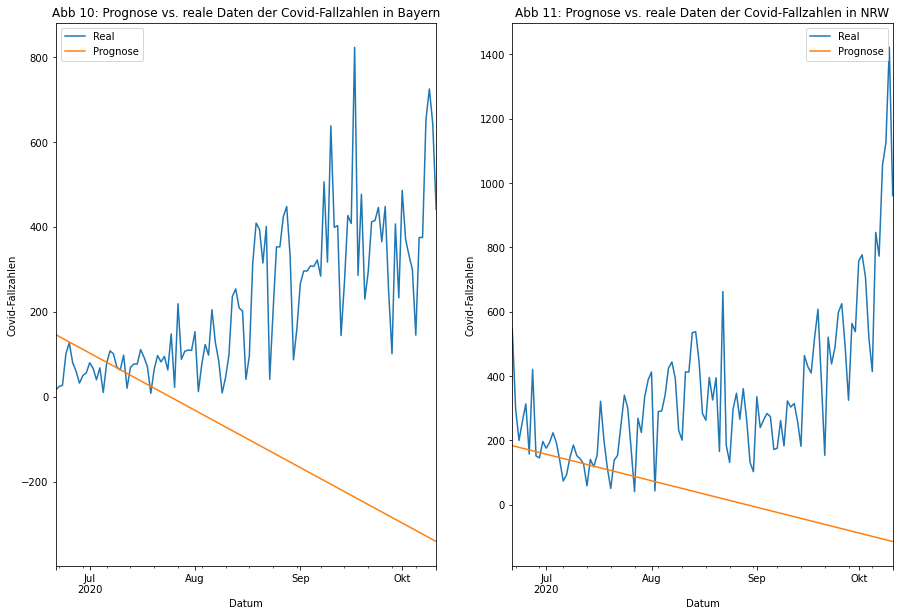

In [14]:
import statsmodels.formula.api as smf

regr = linear_model.LinearRegression()
regr.fit(bundzuwachsraw_1["datef"].to_numpy().reshape(-1, 1), bundzuwachsraw_1["BY"].to_numpy().reshape(-1, 1))
bundzuwachsraw_2['predictionBY'] = regr.predict(bundzuwachsraw_2["datef"].to_numpy().reshape(-1, 1))

regr = linear_model.LinearRegression()
regr.fit(bundzuwachsraw_1["datef"].to_numpy().reshape(-1, 1), bundzuwachsraw_1["NW"].to_numpy().reshape(-1, 1))
bundzuwachsraw_2['predictionNRW'] = regr.predict(bundzuwachsraw_2["datef"].to_numpy().reshape(-1, 1))

f, ax = plt.subplots(1, 2, figsize = (15, 10))

bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'BY', ax=ax[0], label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictionBY', ax=ax[0], label="Prognose")
ax[0].set_title('Abb 10: Prognose vs. reale Daten der Covid-Fallzahlen in Bayern')
ax[0].set_xlabel('Datum')
ax[0].set_ylabel('Covid-Fallzahlen')

bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'NW', ax=ax[1], label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictionNRW', ax=ax[1], label="Prognose")
ax[1].set_title('Abb 11: Prognose vs. reale Daten der Covid-Fallzahlen in NRW')
ax[1].set_xlabel('Datum')
ax[1].set_ylabel('Covid-Fallzahlen')
plt.show()

Als Nächstes werden die Bundesländer NRW und Bayern miteinander verglichen (Abbildungen 10 und 11). Mithilfe der Prognosen und den dazugehörigen realen Daten wurden Liniendiagramme gebildet, um die Daten miteinander zu vergleichen. Aus den Abbildungen kann man herauslesen, dass das lineare Regressionsmodell aufgrund der Daten bis zum 20.06 von einem Abwärtstrend bei beiden Bundesländern ausgeht, jedoch dieser Bei beiden Bundesländern nicht eintrifft.

### Untersuchung eines Zusammenhang zwischen Bevölkerungsdichte und durchschnittliche Wachstumsrate der Fallzahlen

#### deutsche Landkreise

In [15]:
print("Durchschnitt:",compLK["AGR"].mean())
compLK[["Landkreis","AGR"]].sort_values(by="AGR",ascending=False).head(20)

Durchschnitt: 8.467502298440563


,Landkreis,AGR
133,Gütersloh,66.696223
368,Stormarn,65.371782
178,Kleve,60.224518
305,Region Hannover,60.072253
245,Neckar-Odenwald-Kreis,58.651667
327,Rottweil,56.849415
369,Straubing,56.692549
127,Greiz,55.089483
131,Göttingen,53.236604
410,Wesel,51.503075


In [16]:
print("Durchschnitt:",compLK["Bev.D.Ew./km²"].mean())
compLK[["Landkreis","Bev.D.Ew./km²"]].sort_values(by="Bev.D.Ew./km²",ascending=False).head(15)

Durchschnitt: 274.47569444444446


,Landkreis,Bev.D.Ew./km²
372,Stuttgart,2954.0
262,Nürnberg,2688.0
222,Mannheim,2069.0
109,Freiburg im Breisgau,1452.0
146,Heidelberg,1422.0
97,Erlangen,1383.0
292,Pforzheim,1217.0
231,Mettmann,1173.0
323,Rostock,1126.0
172,Kaufbeuren,1050.0


In den oberen beiden Zellen lässt sich gut erkennen, dass es bei deutschen Landkreisen einige Ausreißer in Bezug auf die Bevölkerungsdichte und die durchschnittliche Wachstumsrate gibt. Bei der Bevölkerungsdichte stechen vor allem Stuttgart, Nürnberg und Mannheim heraus. In Bezug auf die durchschnittliche Wachstumsrate der Covid-Fallzahlen stechen die ersten 16 heraus, da sie alle ziemlich weit vom Durchschnitt entfernt sind. 
Somit werden im nächsten Schritt diese Ausreißer entfernt, um danach eine genauere Betrachtung in einem Scatter-Plot samt Trendlinie vorzunehmen.

In [17]:
import statsmodels.formula.api as smf

#Ausreißer entfernen
for j in range(16):    
    idx = compLKfnl['AGR'].idxmax()
    compLKfnl = compLKfnl.drop(idx)
for j in range(3):    
    idx = compLKfnl['Dichte'].idxmax()
    compLKfnl = compLKfnl.drop(idx)

lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

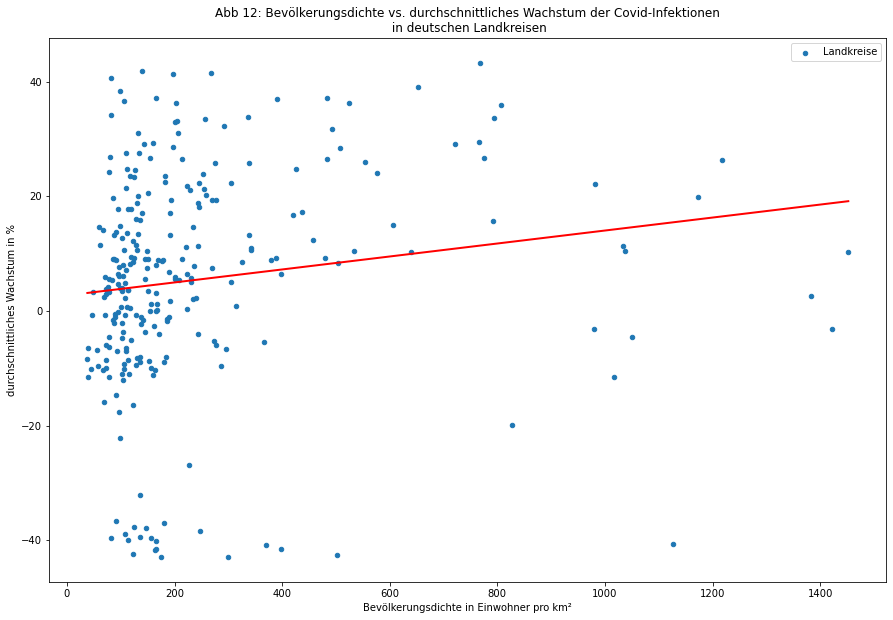

In [18]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLKfnl.plot(kind='scatter', x = 'Dichte', y= 'AGR', ax=ax, label="Landkreise")
plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Abb 12: Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen\n in deutschen Landkreisen')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte in Einwohner pro km²')

In [19]:
print('p-Wert: \n',lm.pvalues)
print('\nKorrelation: \n',compLKfnl.corr())
lm.summary()

p-Wert: 
 Intercept    0.091787
Dichte       0.013873
dtype: float64

Korrelation: 
              AGR    Dichte     AGR_D
AGR     1.000000  0.149594  0.670457
Dichte  0.149594  1.000000  0.012908
AGR_D   0.670457  0.012908  1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGR   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     6.135
Date:                 Mi, 24 Nov 2021   Prob (F-statistic):             0.0139
Time:                        16:49:26   Log-Likelihood:                -1176.5
No. Observations:                 270   AIC:                             2357.
Df Residuals:                     268   BIC:                             2364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7156      1.605      1.692      0.092      -0.444       5.875
Dichte         0.0113      0.005      2.477      0.014       0.002       0.020
==============================================================================
Omnibus:                       21.906   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.980
Skew:                          -0.681   Prob(JB):                     3.76e-06
Kurtosis:                       3.603   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In diesem Scatterplot (Abb. 12) kann man mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstum. Bei einer x höheren Bevölkerungsdichte würde das durchschnittliche Wachstum um 2,72 + 0,011x steigen. Der P-Wert von 0,1 unterstützt die Hypothese, dass es einen Zusammenhang zwischen Bevölkerungsdichte und durchschnittlichen Wachstum der Coronazahlen. Auch die Korrelation unterstützt diese Aussage.

#### amerikanische Counties

In [20]:
print("Durchschnitt:",DFCounty["AGR"].mean())
DFCounty[["County","AGR"]].sort_values(by="AGR",ascending=False).head(10)

Durchschnitt: 2.9597590905871973


,County,AGR
2557,Trousdale County_TN,645.690589
2556,Tipton County_TN,186.807027
3150,Racine County_WI,172.270336
1317,Oakland County_MI,156.130320
2095,Columbiana County_OH,130.241867
467,Hall County_GA,118.162033
228,San Bernardino County_CA,117.961570
2739,Moore County_TX,92.683597
324,Windham County_CT,91.441000
816,Buena Vista County_IA,91.305501


In [21]:
print("Durchschnitt:",DFCounty["Density"].mean())
DFCounty[["County","Density"]].sort_values(by="Density",ascending=False).head(16)

Durchschnitt: 197.37497021528534


,County,Density
1893,New York County_NY,48358.254157
1886,Kings County_NY,26426.169093
1865,Bronx County_NY,24698.833159
1903,Queens County_NY,12708.531153
2335,Philadelphia County_PA,11102.214746
1814,Hudson County_NJ,10799.726951
2875,Arlington County_VA,9119.830574
1252,Suffolk County_MA,6695.319397
1812,Essex County_NJ,6165.406281
1825,Union County_NJ,5275.374550


Auch bei den amerikanischen Counties müssen einige Ausreißer entfernt werden. Wobei auch hier wieder auf die Bevölkerungsdichte und die durchschnittliche Wachstumsrate geschaut wird. Über die Bevölkerungsdichte fallen vor allem große Metropolregionen wie New York oder Washington DC heraus. Bei den Ausreißern der durchschnittlichen Wachstumsrate ließ sich kein Muster erkennen.

In [22]:
for j in range(12):    
    idx = DFCounty['Density'].idxmax()
    DFCounty = DFCounty.drop(idx)
for j in range(7):    
    idx = DFCounty['AGR'].idxmax()
    DFCounty = DFCounty.drop(idx)
    
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

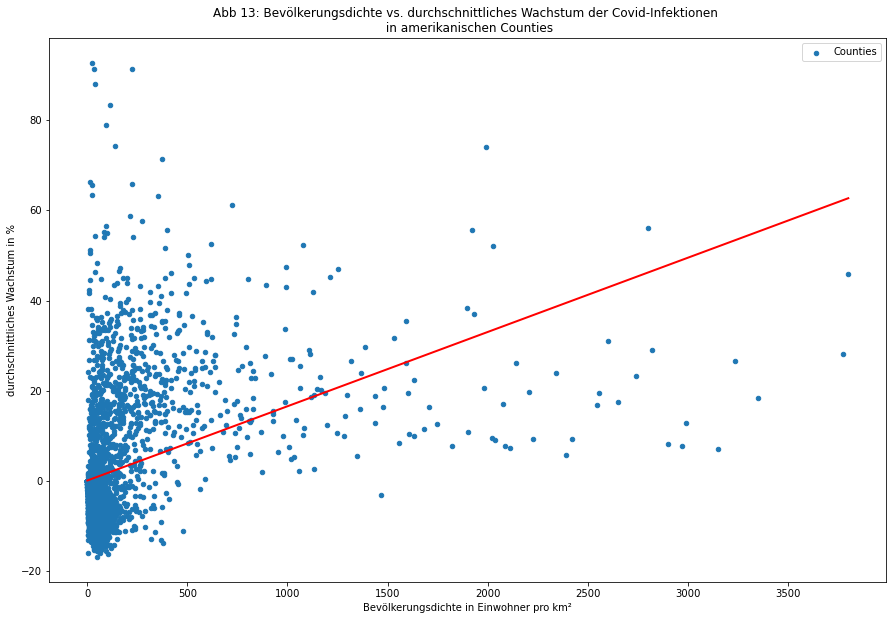

In [23]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax,label="Counties")
plt.plot(trend2, preds2, c='red', linewidth=2)
ax.set_title('Abb 13: Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen \n in amerikanischen Counties')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte in Einwohner pro km²')

In [24]:
lm2.params

Intercept    0.093297
Density      0.016464
dtype: float64

In Abbildung 13 lässt sich mithilfe der Trendlinie sehen, je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstum der Covid-Fallzahlen. Bei einer x höheren Bevölkerungsdichte würde das durchschnittliche Wachstum um 0,093 + 0,016x steigen. Die Steigung ist höher als die der deutschen Landkreise.

### Clustering

In [25]:
from sklearn.cluster import KMeans
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population',"State"])
km = KMeans(n_clusters=4)
km.fit(DFCountyfnl)
y_km = km.predict(DFCountyfnl)

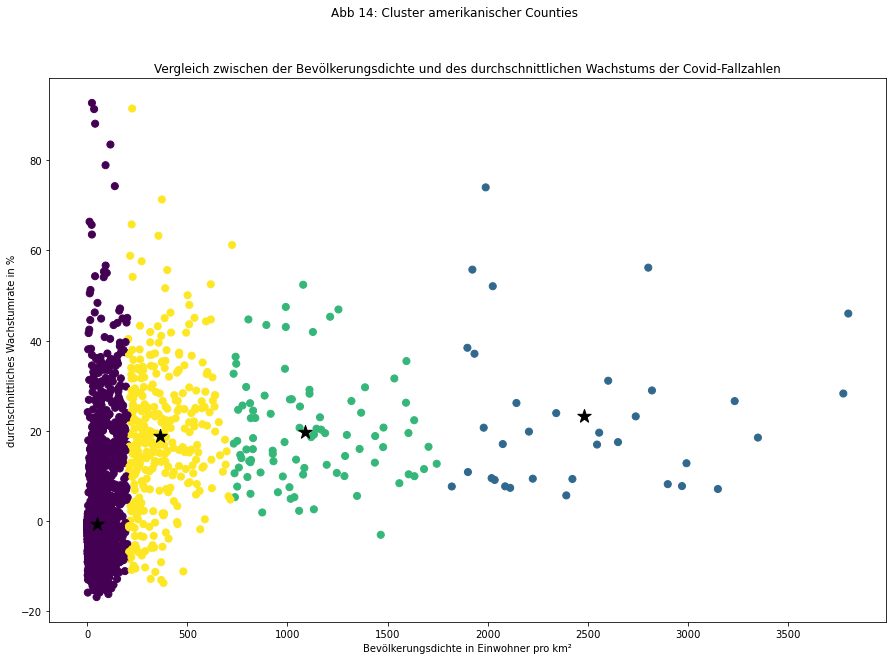

In [26]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyfnl["Density"], DFCountyfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstums der Covid-Fallzahlen")
plt.suptitle("Abb 14: Cluster amerikanischer Counties")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

Abbildung 14 zeigt die Cluster des zuvor erstellen Streudiagramms (Abb. 9) mit 4 Center. Wie man sieht, geben die Daten zum Clustern nicht viel her. Es entstehen keine Gruppierungen. Dieser Datensatz erscheint mehr wie ein großes Cluster.

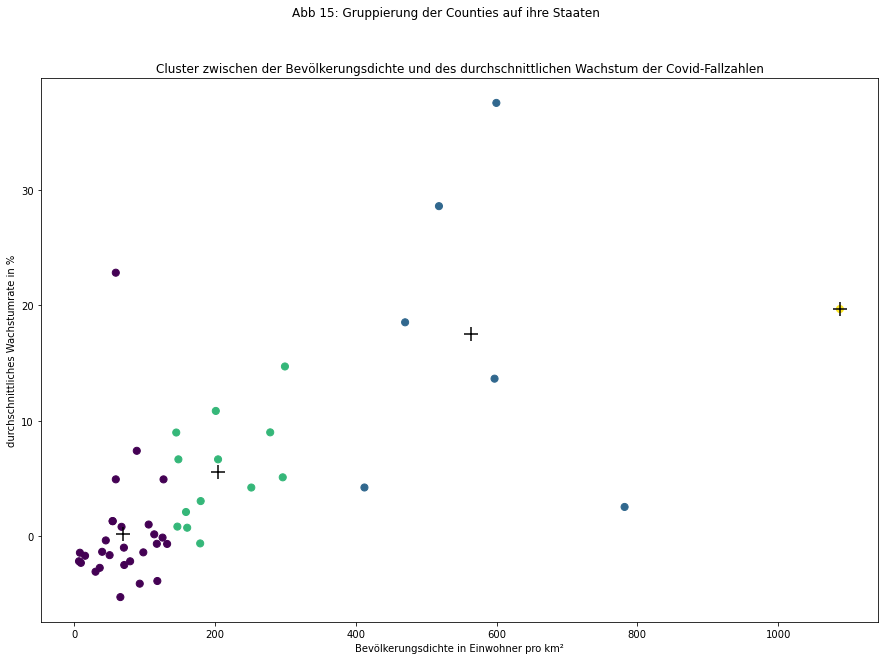

In [27]:
group_state = DFCounty[['AGR','Density','State']].groupby('State').mean()

km = KMeans(n_clusters=4)
km.fit(group_state)
y_km = km.predict(group_state)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(group_state["Density"], group_state['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='+',s=200, alpha=1)
plt.title("Cluster zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Covid-Fallzahlen")
plt.suptitle("Abb 15: Gruppierung der Counties auf ihre Staaten")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

### Nearest Neighbor Klassifizierung

In [28]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [29]:
neigh = pd.DataFrame()
DFCountyfnl = DFCountyfnl.fillna(0)
neigh = DFCountyfnl
neigh['Typ'] = 0
neigh = neigh.rename(columns={'Density':'Dichte'})
neighDE = pd.DataFrame()
neighDE = compLKfnl
neighDE['Typ'] = 1
neigh = neigh.append(neighDE)

In [30]:
y = neigh['Typ'].to_numpy()
X = neigh[['Dichte','AGR']].to_numpy()

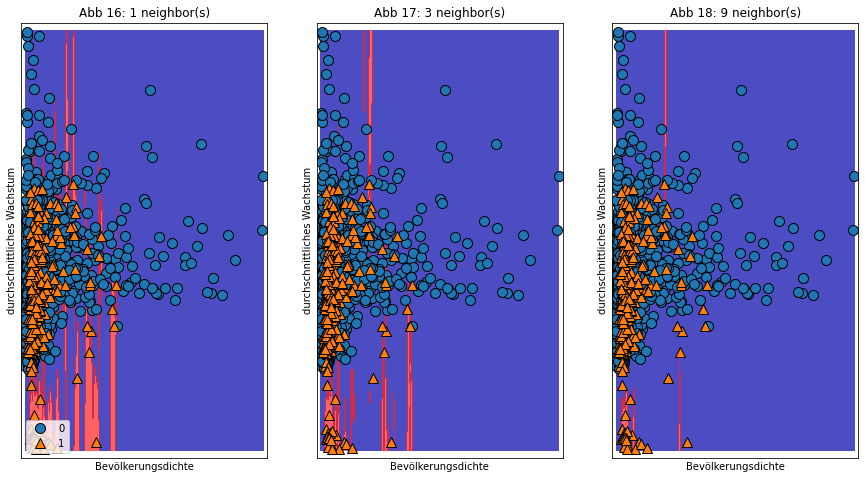

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(15,8))
i = 16

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    temp = "Abb " + str(i) + ": " + str(n_neighbors) + " neighbor(s)"
    ax.set_title(temp)
    ax.set_ylabel("durchschnittliches Wachstum")
    ax.set_xlabel("Bevölkerungsdichte")
    i += 1
    
axes[0].legend(loc=3)
plt.show()

In [32]:
print("Test set score: {:.5f}".format(score))

Test set score: 0.88807


Die Abbildungen 16 bis 18 zeigen die Nearest Neigbor Untersuchung zwischen den zwei Merkmalen Bevölkerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Dabei wurde nach Deutschland = 1 und Amerika = 0 klassifiziert. Es sollte noch dazu gesagt werden, dass 3000 amerikanische Counties gegenüber 300 deutschen Landkreisen stehen.
Hier kam ein Score von 0.88807 für die Testdaten heraus. Dieser Wert ist nicht schlecht, was aber auch daran liegen kann, dass auf jeden Landkreis acht Counties kommen und hier somit ein Ungleichgewicht vorherrscht.